<img src="ml2_group_assignment.png" width="800"/>

# <font color=green> Introduction </font>

The assignment is focused on solving the Forest Cover Type Prediction: https://www.kaggle.com/c/forest-cover-type-prediction/overview. This task proposes a classification problem: predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data).

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. 

**You must predict the Cover_Type for every row in the test set (565892 observations).**

<img src="tree_types.png" width="800"/>

# <font color=green> Table of contents </font>

* Data Analysis
* Exploratory Data Analysis
* Feature Engineering & Selection
* Compare Several Machine Learning Models
* Perform Hyperparameter Tuning on the Best Model
* Interpret Model Results
* Evaluate the Best Model with Test Data (replying the initiating question)
* Summary & Conclusions

# Sections 
* [Libaries used](#0)
* [1. Import Data](#1)
* [2. Data analysis](#2)  
  * [2.1.Explanation of variables](#2.1)
      * [1.2.1 XX](#2.1.1)
* [3. Exploratory Data Analysis](#3)
  * [3.1 Analysis of the Dataset using EDA](#3.1)
  * [3.2 D'Agostino and Pearson's Test](#3.2)  
  * [3.3 Checking Variable Completeness ](#3.3)
  * [3.4 Correlation Matrix ](#3.4)  
  * [3.5 Paired density, scatterplot matrix and 3D Graphics ](#3.5)   
  * [3.6 Categorial EDA ](#3.6) 
      * [3.6.1 Categorial Bar Diagrams](#3.6.1)  
      * [3.6.2.Violinplot with Dependent Variable](#3.6.2)  
      * [3.6.3.Treemap for categorial Data](#3.6.3) 
* [4. Baseline Model](#4)
  * [4.0 Prepare Data and Standardization](#4.0)
  * [4.1 Random Forest](#4.1) 
  * [4.2 Gradient Boosting](#4.2)  
  * [4.3 Decision Trees](#4.3)
  * [4.4 K-Nearest Neighbors (KNN)](#4.4)  
  * [4.5 Logistic Regression](#4.5) 
  * [4.6 Naive Bayes](#4.6) 


<img src="roosevelt-national-forest.jpeg" width=1200 height=800 align="center">

<a id='0'></a>
# <font color=green> Libraries used </font>

In [1]:
!pip install squarify

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns  # Graphing
import matplotlib.pyplot as plt
import squarify #treemap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from yellowbrick.classifier import ROCAUC
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ROCAUC

<a id='0'></a>
##  <font color=green>0.Import the Data </font>
Let’s load the training data and create data frame

In [3]:
data_train = pd.read_csv("train.csv")

Let's keep the original dataset for later comparisons and make a copy for the FE process

In [4]:
df_original = data_train.copy()

In [5]:
data_train.tail()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
15115            0            0            0           3  
15116            0            0            0           3  
15117            0            0            0           3  
15118            0            0            0           3  
15119            0            0            0           3  

[5 rows x 56 columns]

In [6]:
data_test = pd.read_csv("test.csv")
pd.set_option('display.max_columns', None)
data_test.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  15121       2680     354     14                                 0   
1  15122       2683       0     13                                 0   
2  15123       2713      16     15                                 0   
3  15124       2709      24     17                                 0   
4  15125       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            196             214            156   
1            201             216            152   
2            206             208            137   
3            208             201            125   
4            210             195            115   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6645                 1                 0   
1                                6675                 1                 0   
2                                6344                 1                 0   
3                                6374                 1                 0   
4                                6404                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0

In [7]:
data_test.shape

(565892, 55)

In [8]:
column_list = data_train.columns
num  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
cat= [column for column in column_list if column not in num]

In [9]:
from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X = data_train.drop(['Cover_Type'], axis=1)
y = data_train['Cover_Type']
column_list = X.columns

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=37,stratify=y)
print("The shape of validation data:{} and {} ".format(X_val.shape,y_val.shape))
print("The shape of training data:{} and {} ".format(X_train.shape,y_train.shape))

The shape of validation data:(3024, 55) and (3024,) 
The shape of training data:(12096, 55) and (12096,) 


## <font color=green> Dataset split on all features & Standardization  <font>
Due to excel import, it transforms a new column unnamed

In [11]:
import pandas as pd
all_feat_df = pd.read_csv("all_features_data_train.csv")
all_feat_df = all_feat_df[all_feat_df.columns.drop(list(all_feat_df.filter(regex='Unnamed:')))]
pd.set_option('display.max_columns', None)
all_feat_df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0        

In [12]:
all_feat_df.shape

(15120, 160)

From 55 features, we engineered a total of 165 additional ones

For scaling we need to exclude the dummy variables 

In [13]:
column_list = all_feat_df.columns
numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
categorial= [column for column in column_list if column not in numerical]

In [14]:
X_all = all_feat_df.drop(['Cover_Type'], axis=1)
y_all = all_feat_df['Cover_Type']
column_list = X.columns

X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(X_all, y_all, test_size=0.20, random_state=37,stratify=y)
print("The shape of validation data:{} and {} ".format(X_val.shape,y_val.shape))
print("The shape of training data:{} and {} ".format(X_train.shape,y_train.shape))

The shape of validation data:(3024, 55) and (3024,) 
The shape of training data:(12096, 55) and (12096,) 


## <font color=green> Dataset split on the new features & Normalisation  <font>

Select features from the feature selection are transferred to cvs

In [15]:
import pandas as pd
X_selected1 = pd.read_csv("X_selected.csv")
y_selected1 = pd.read_csv("y_selected.csv")

In [16]:
X_selected1 = X_selected1[X_selected1.columns.drop(list(X_selected1.filter(regex='Unnamed:')))]
y_selected1 = y_selected1[y_selected1.columns.drop(list(y_selected1.filter(regex='Unnamed:')))]

In [17]:
print(X_selected1.shape)
print(y_selected1.shape)

if X_selected1.shape[0] != y_selected1.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(15120, 26)
(15120, 1)


We need to filter out the dummy variables for the normalization 

In [18]:
column_list = X_selected1.columns
scale_numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
scale_categorial= [column for column in column_list if column not in scale_numerical ]

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Splitting the data into train and validation test 

In [20]:
column_list = X_selected1.columns

X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_selected1, y_selected1, test_size=0.20, random_state=42,stratify=y_selected1)
print("The shape of validation data:{} and {} ".format(X_val_new.shape,y_val_new.shape))
print("The shape of training data:{} and {} ".format(X_train_new.shape,y_train_new.shape))

The shape of validation data:(3024, 26) and (3024, 1) 
The shape of training data:(12096, 26) and (12096, 1) 


In [21]:
X_train_new[scale_numerical] = scaler.fit_transform(X_train_new[scale_numerical])
X_val_new[scale_numerical] = scaler.fit_transform(X_val_new[scale_numerical])

In [22]:
y_train_new = y_train_new.values.ravel()
y_val_new = y_val_new.values.ravel()

In [23]:
#test a different dataframe
X_trial = pd.read_csv("X_trial.csv")
y_trial = pd.read_csv("y_trial.csv")

In [24]:
column_list = X_trial.columns
scale_numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
scale_categorial= [column for column in column_list if column not in scale_numerical ]

In [25]:
X_trial = X_trial[X_trial.columns.drop(list(X_trial.filter(regex='Unnamed:')))]
y_trial = y_trial[y_trial.columns.drop(list(y_trial.filter(regex='Unnamed:')))]

In [26]:

X_train_newt, X_val_newt, y_train_newt, y_val_newt = train_test_split(X_trial, y_trial, test_size=0.20, random_state=42,stratify=y_selected1)
print("The shape of validation data:{} and {} ".format(X_trial.shape,y_val_new.shape))
print("The shape of training data:{} and {} ".format(X_train_new.shape,y_train_new.shape))

The shape of validation data:(15120, 26) and (3024,) 
The shape of training data:(12096, 26) and (12096,) 


Running the correlation matrix, many of these features are correlated. I create another dataframe for only relevant features

I create a subsplit with a dataframe containing only these features instead, based on the split made above

# <font color=green> 7 Re-run models with the new selected features  <font>
## <font color=green> Dataset split on the new features  <font>
Some classes such as SDG classifier , Random Forest classifier and naive Bayes classifier can handle mutliple classes naively. Others like logistic regression or Support Vector Machine classifier are stricly binary classifier. However there are various strategies to perform multiclass classification with multiple binary classifiers. 
* Decision Trees
* Random Forest (XGB Boost)
* KNN
* Logistic Regression 

In [27]:
# Create a dataFrame to compare performance of Classifier Models
classifiers_compare = pd.DataFrame(columns =['Algorithm','Mean CV Score'])

Checking Correlation among features 

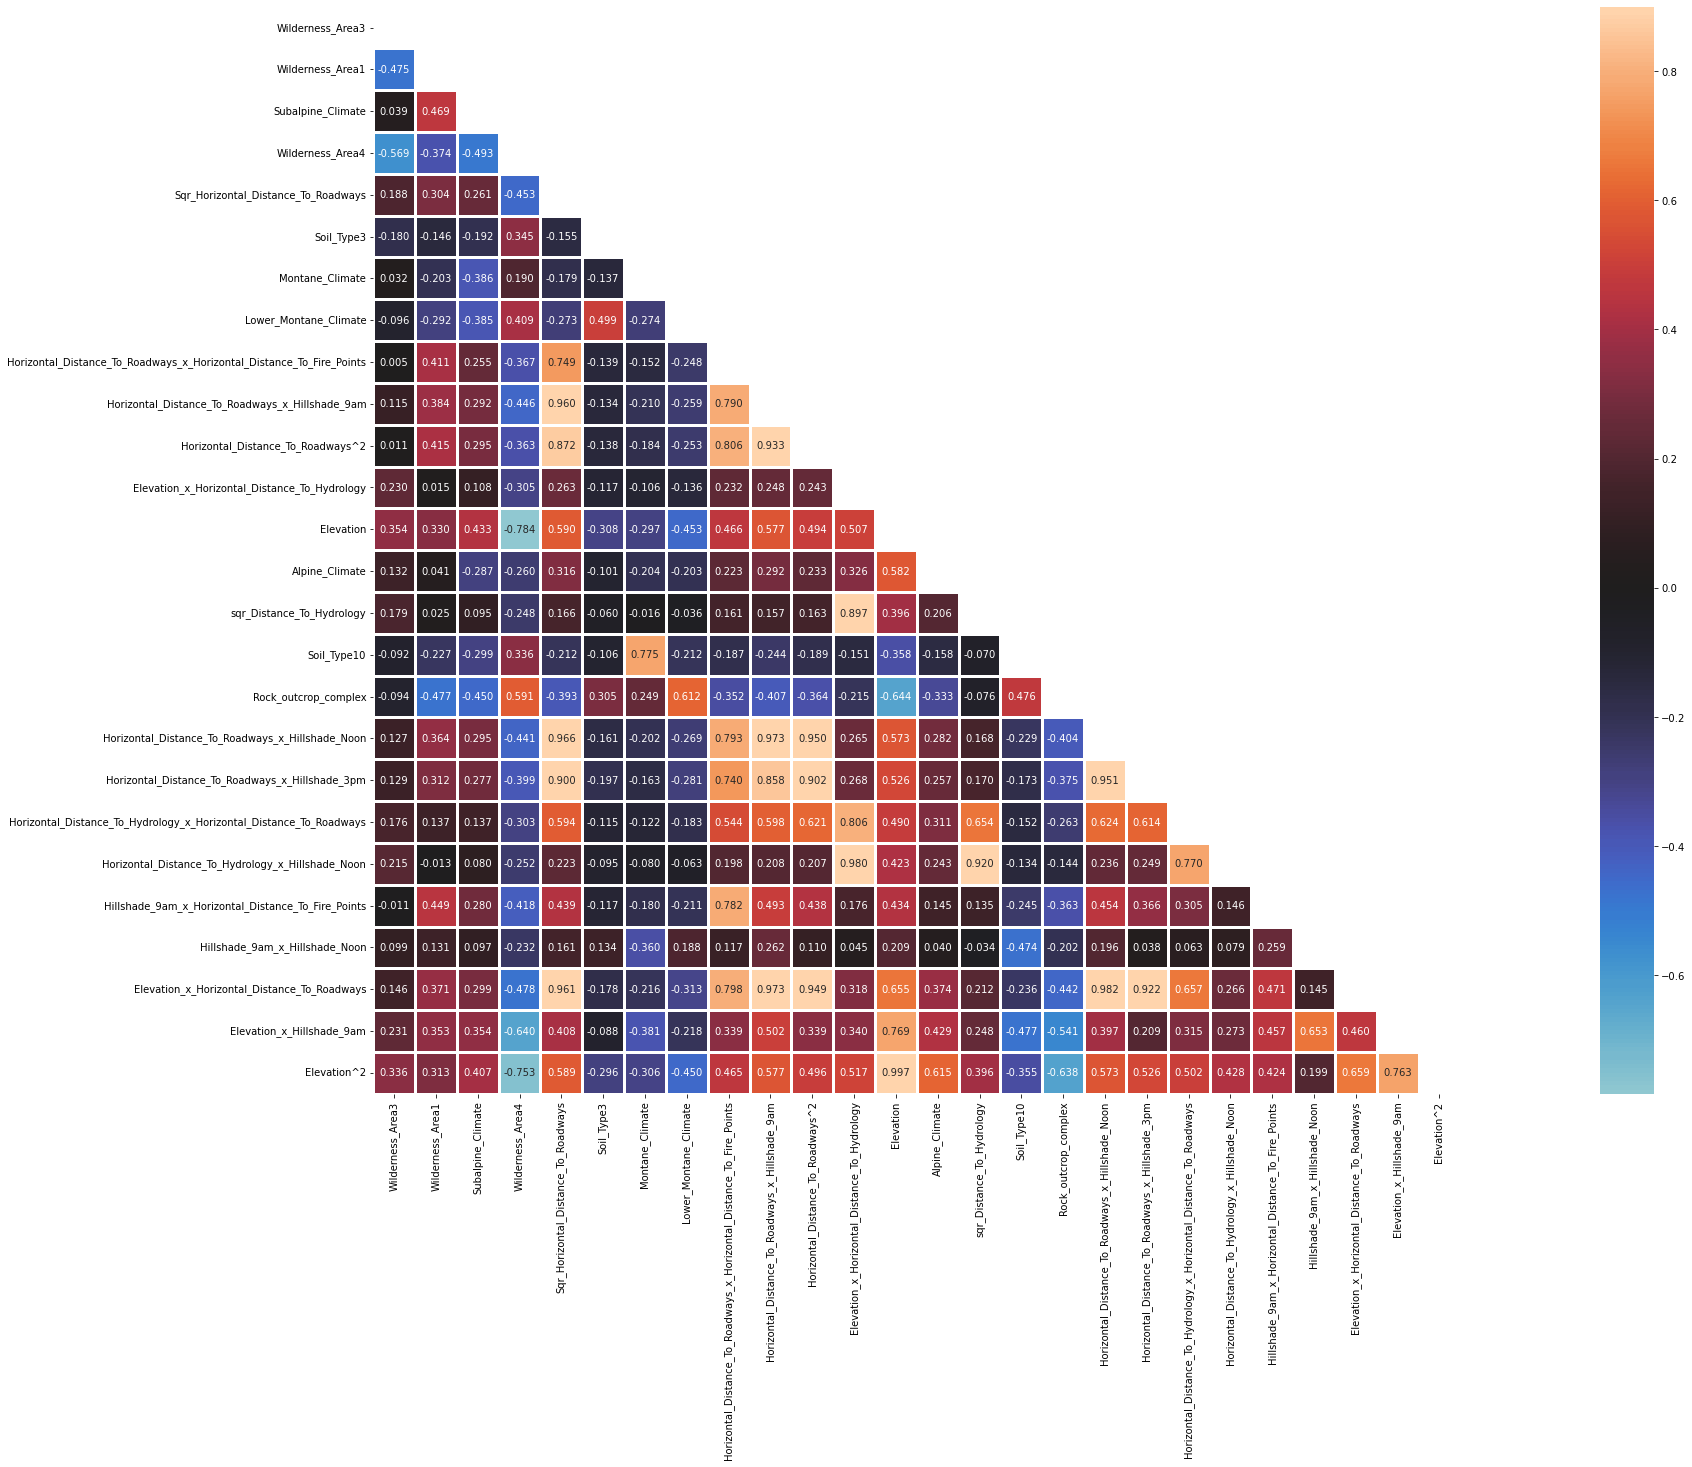

In [28]:
#Heatmap - Checking for autocorrelation among variables 
matrix = X_selected1.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50,20))
heatmap = sns.heatmap(matrix, center=0, fmt=".3f", square=True, annot=True, linewidth=1.3, mask = mask,vmax=0.9);
plt.show()

Some of these features are heavily correlated one another, before running the model, we should ensure, only relevant features are considered, taking a threshold of 0.7 these are:

- Wilderness Area 1 
- Subalpine Climate (synthetic)
- Wilderness Area 3
- Elevation
- Family Moran (synthetic)
- Soil Type 3
- Soil Type 12
- Rock outcrop complex (synthetic)
- Lower Montane Climate (synthetic)
- Family Catamount (synthetic)

TOTAL: 11 features

Done with correlation, time to fit the model

In [83]:
def plot_ROC_curve(model, X_train,y_train, X_val, y_val):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={1: 'Spruce/Fir', 
                                        2: 'Lodgepole Pine', 
                                        3: 'Ponderosa Pine',
                                       4: 'Cottonwood/Willow',
                                       5: 'Aspen',
                                       6: 'Douglas-fir',
                                       7: 'Krummholz'})

                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train,y_train)
    visualizer.score(X_val, y_val)
    visualizer.show()
    
    return visualizer

## <font color=green> 7.1. Decision Trees  <font>

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import xgboost
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from dtreeviz.trees import *
from sklearn.model_selection import GridSearchCV


In [31]:
def plot_tree(tree, feature_names):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, feature_names=feature_names, filled=True, rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())


### <font color=green> 7.1.1. Single Tree <font>

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [76]:
tree = DecisionTreeClassifier(random_state=18)
model_tree = tree.fit(X_train_new, y_train_new)

In [77]:
y_pred_tr = tree.predict(X_train_new)
y_pred_ts = tree.predict(X_val_new)

In [78]:
print("Training Results:\n")
print(classification_report(y_train_new, y_pred_tr))
print("\nTesting Results:\n")
print(classification_report(y_val_new, y_pred_ts))

Training Results:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1728
           2       1.00      1.00      1.00      1728
           3       1.00      1.00      1.00      1728
           4       1.00      1.00      1.00      1728
           5       1.00      1.00      1.00      1728
           6       1.00      1.00      1.00      1728
           7       1.00      1.00      1.00      1728

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096


Testing Results:

              precision    recall  f1-score   support

           1       0.64      0.63      0.63       432
           2       0.55      0.58      0.57       432
           3       0.64      0.69      0.67       432
           4       0.89      0.85      0.87       432
           5       0.84      0.72      0.78       432
           6       0.67      0.73      0

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



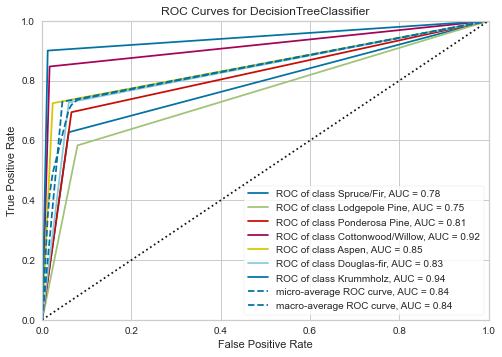

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={1: 'Spruce/Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine',
                4: 'Cottonwood/Willow', 5: 'Aspen', 6: 'Douglas-fir',
                7: 'Krummholz'},
       estimator=DecisionTreeClassifier(random_state=18))

In [85]:
plot_ROC_curve(model_tree, X_train_new,y_train_new, X_val_new, y_val_new)

Random

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [88]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train_new,y_train_new)

In [89]:
forest.score(X_val_new,y_val_new)

0.8273809523809523

In [91]:
# Make predictions for the test set
y_pred_test_forest = forest.predict(X_val_new)

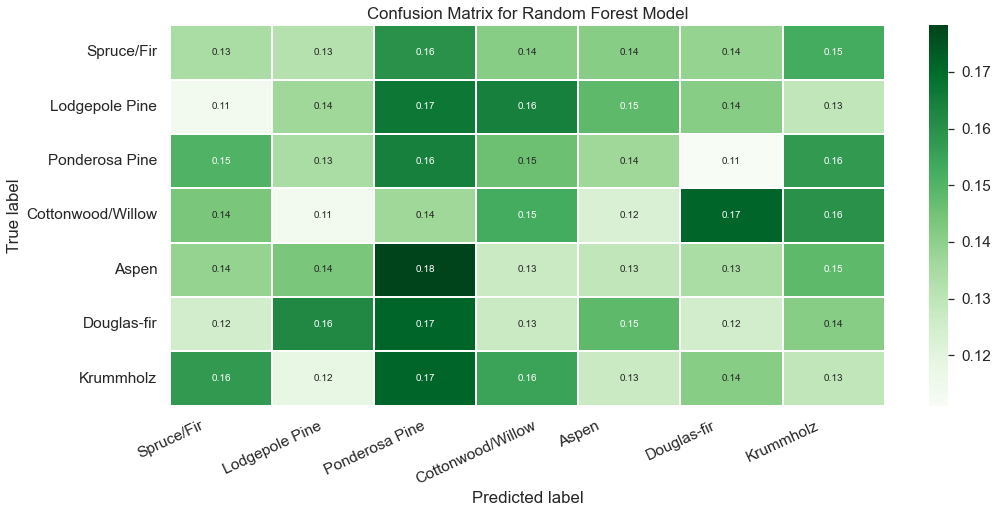

In [92]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_val, y_pred_test_forest)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [93]:
print(classification_report(y_val_new, y_pred_test_forest))

              precision    recall  f1-score   support

           1       0.76      0.74      0.75       432
           2       0.71      0.67      0.69       432
           3       0.74      0.85      0.79       432
           4       0.93      0.95      0.94       432
           5       0.92      0.88      0.90       432
           6       0.80      0.77      0.78       432
           7       0.93      0.95      0.94       432

    accuracy                           0.83      3024
   macro avg       0.83      0.83      0.83      3024
weighted avg       0.83      0.83      0.83      3024



### <font color=green> 7.1.2. Bagging <font>

In [32]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, 
                               bootstrap=True, n_jobs = 1)
bag_clf.fit(X_train_new, y_train_new)
y_pred = bag_clf.predict(X_val_new)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(bag_clf, X_train_new, y_train_new))))

Accuracy = 0.7030


In [33]:

X = X_train_new
y = y_train_new
tree_1 = DecisionTreeClassifier(random_state=42)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(tree_1, X, y))))

Accuracy = 0.7750


Get a low accuracy with correlated features, I try below with a different split set (taking out correlated features)

An even worse accuracy... Let's see how the tree looks like

### <font color=green> 7.1.3. XGBoost <font>

## <font color=green> 7.1. Random Forest   <font>

## <font color=green> 7.1. XGB Boost  <font>

## <font color=green> 7.1. KNN  <font>
KNN is better on smaller dataset, however we will evaluate the performance of this model 

In [34]:
from sklearn.neighbors import KNeighborsClassifier

To find out the best value for k we will use a for loop, and with the range from 1 to 200 range (1,200,10). I reduced the range to 10 but will use iterations of 1. And it gives me the best K = 1. 

In [35]:
k_neighbors_list = range (1,100,1)

results_list = []

for k in k_neighbors_list:
    clf = KNeighborsClassifier(n_neighbors=k, p=1) # using manhattan_distance 
    clf.fit(X_train_new, y_train_new)
    y_pred_test = clf.predict(X_val_new)
    acc_k = accuracy_score(y_val_new, y_pred_test)
    
    results_list.append({
        "k": k,
        "acc": acc_k
    })
    
results = pd.DataFrame(results_list)

p = 1 (Manhatten Distance), the best k = 8 with accuracy= 0.759259
p = 2 (Euclidean Distance), the best k = 1 with accuracy = 0.761905

Checking the best value for K and accuracy 

In [36]:
test = results.sort_values('acc', ascending = False) 
test

k       acc
0    1  0.834656
2    3  0.822090
3    4  0.813161
1    2  0.811839
6    7  0.809193
..  ..       ...
87  88  0.708333
95  96  0.708333
96  97  0.708003
97  98  0.708003
93  94  0.707672

[99 rows x 2 columns]

Text(0, 0.5, 'Testing Accuracy')

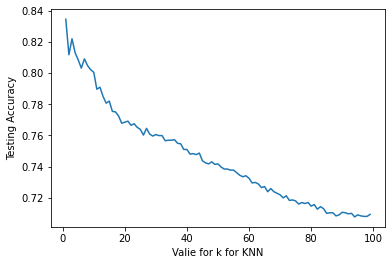

In [37]:
plt.plot(results['k'],results['acc'])
plt.xlabel('Valie for k for KNN')
plt.ylabel('Testing Accuracy')

In [38]:
k_neighbors_list = range (1,40,1)

K_scores = []

for k in k_neighbors_list:
    # Run KNeighborsClassifier with k neighbours 
    knn = KNeighborsClassifier(n_neighbors=k, p=1) # using manhattan_distance 
    # Obtain Cross_val_score for KneighborsClassifier with k neighbors 
    scores = cross_val_score(knn,X_train_new, y_train_new, cv= 5, scoring= "accuracy")
    # Append mean of scores for K neighbors to k_scores list 
    K_scores.append({
        "k": k,
        "acc": scores.mean
    })
    
results = pd.DataFrame(K_scores)

In [39]:
#test = results.sort_values(K_scores, ascending = False) 
#test

Using Grridsearch and cross validation we will adapt the model. <br>
We first create a KNN classifier instance and then prepare a range of values of hyperparameter K from 1 to 31 that will be used by GridSearchCV to find the best value of K.

Furthermore, we set our cross-validation batch sizes cv = 5 and set scoring metrics as accuracy as our preference.

In [40]:
cross_valid_scores = {}
parameters = {
    "n_neighbors": list(range(1,20,1)),
    "leaf_size":list(range(1,100,20)),
    "metric":["euclidean","manhattan"]    
}

model_KNN = KNeighborsClassifier()

model_KNN = GridSearchCV(
    model_KNN,
    parameters,
    cv=5,
    scoring = "accuracy"

)
KNN_results = model_KNN.fit(X_train_new, y_train_new)

In [41]:
KNN_results.best_score_
KNN_results.best_estimator_
KNN_results.best_params_

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 1}

In [42]:
accuracy = KNN_results.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 83.89%


Using the best model to calculate the mean cross validation score to compare the model later with each other

In [43]:
knn = KNeighborsClassifier(n_neighbors=1,leaf_size=1,metric='euclidean')

scores = cross_val_score(knn, X_train_new, y_train_new, cv = 10, scoring = "accuracy")

In [44]:
print("Accuracy = {0:.4f}\n".format(accuracy_score(model_KNN.predict(X_val_new), y_val_new)))
print("Classification Report")
print(classification_report(model_KNN.predict(X_val_new), y_val_new))

Accuracy = 0.8347

Classification Report
              precision    recall  f1-score   support

           1       0.74      0.78      0.76       411
           2       0.64      0.74      0.69       373
           3       0.84      0.76      0.80       476
           4       0.94      0.92      0.93       442
           5       0.95      0.87      0.91       469
           6       0.77      0.82      0.79       407
           7       0.97      0.94      0.95       446

    accuracy                           0.83      3024
   macro avg       0.83      0.83      0.83      3024
weighted avg       0.84      0.83      0.84      3024



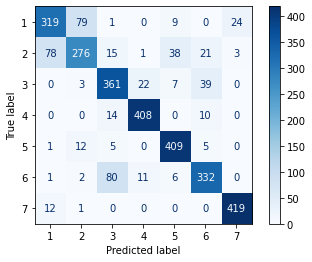

In [45]:
plot_confusion_matrix(model_KNN,X_val_new, y_val_new,cmap=plt.cm.Blues,values_format='d' )

In [46]:
classifiers_compare = classifiers_compare.append({'Algorithm': "KNN", 'Mean CV Score':(scores.mean())},ignore_index=True)

kNN is simple to use and can return very accurate and meaningful results. It also has a tendency to be computationally expensive, so it may not be your best choice for larger datasets. 

## <font color=green> 7.1. SVM  <font>
The multiclass problem is broken down to multiple binary classification cases, which is also called one-vs-one. In scikit-learn one-vs-one is not default and needs to be selected explicitly (as can be seen further down in the code). One-vs-rest is set as default. It basically divides the data points in class x and rest. Consecutively a certain class is distinguished from all other classes.  The penalty term C is set to 1 for all classifiers. For the multiclass classification, the type one-versus-one is specified, as can be seen in decision_function_shape=’ovo’

In [47]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(svm.SVC(C=10,kernel='rbf'))
ovr_clf.fit(X_train_new, y_train_new)
print("SVM Accuracy = {:.4f}".format(np.mean(cross_val_score(ovr_clf, X_train_new, y_train_new))))

SVM Accuracy = 0.7406


The Model output is not very good, lets fine tune the SVM parameters to further improve the model performance. 
_C_ is the balance between margin violations (low C) or better generalization of the models. _Gamma_ acts like a regularization hyperparamter. If the model is overfitting it is advisable to redeuce it.If it is underfitting you should increase it. The best Kernel to use if the dataset is large is _Gaussoan RBF kernel_. Since we already used Polynominal in our dataset we will disregard this option. 

In [48]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score


model_to_set = OneVsRestClassifier(SVC(kernel="rbf"))

parameters = {
    "estimator__C": [1,10,100],
    "estimator__gamma":[0.01,0.0001,0.00001],
}

estimator = GridSearchCV(model_to_set, param_grid=parameters, cv=5, n_jobs=-1)

estimator.fit(X_train_new, y_train_new)

print(estimator.best_score_)
print (estimator.best_params_)

0.6789019777997192
{'estimator__C': 100, 'estimator__gamma': 0.01}


The best parameters are {'estimator__C': 100, 'estimator__gamma': 0.01} with a score of 0.68


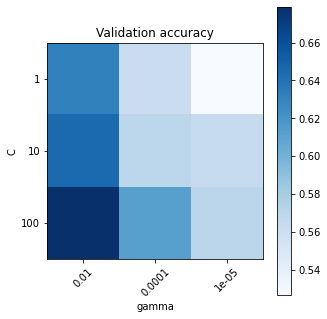

In [49]:
print("The best parameters are %s with a score of %0.2f"
      % (estimator.best_params_, estimator.best_score_))


scores = estimator.cv_results_['mean_test_score'].reshape(len(parameters['estimator__C']), len(parameters['estimator__gamma']))

# Draw heatmap of the validation accuracy as a function of gamma and C

plt.figure(figsize=(5, 5))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(parameters['estimator__gamma'])), parameters['estimator__gamma'], rotation=45)
plt.yticks(np.arange(len(parameters['estimator__C'])), parameters['estimator__C'])
plt.title('Validation accuracy')
plt.show()

In [50]:
final_model = estimator.best_estimator_
Y_pred = final_model.predict(X_val_new)
print("Training set score for SVM: %f" % final_model.score(X_train_new , y_train_new))
print("Testing  set score for SVM: %f" % final_model.score(X_val_new  , y_val_new ))

Training set score for SVM: 0.686756
Testing  set score for SVM: 0.674603


In [51]:
scores = cross_val_score(final_model, X_train_new, y_train_new, cv = 10, scoring = "accuracy")

In [52]:
print(classification_report(final_model.predict(X_val_new), y_val_new))

              precision    recall  f1-score   support

           1       0.74      0.59      0.66       537
           2       0.33      0.66      0.44       214
           3       0.75      0.55      0.63       588
           4       0.96      0.81      0.88       514
           5       0.68      0.65      0.66       450
           6       0.41      0.59      0.49       305
           7       0.86      0.89      0.88       416

    accuracy                           0.67      3024
   macro avg       0.67      0.68      0.66      3024
weighted avg       0.72      0.67      0.69      3024



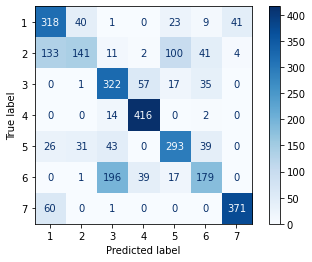

In [53]:
plot_confusion_matrix(final_model,X_val_new, y_val_new,cmap=plt.cm.Blues,values_format='d' )

In [54]:
classifiers_compare = classifiers_compare.append({'Algorithm': "SVM", 'Mean CV Score':(scores.mean())},ignore_index=True)

## <font color=green> 7.1. Naive Bayes  <font>

Since we have a classification problem with multiple discrete values we use the multinominal Naive Bayes method

In [55]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
mnb = MultinomialNB()

# Train the model using the training sets
mnb.fit(X_train_new,y_train_new)

#Predict Output
y_pred= mnb.predict(X_val_new)
scores = cross_val_score(mnb,X_train_new,y_train_new,cv = 5, scoring = "accuracy")
# Model Accuracy, how often is the classifier correct?
print("Mean Accuracy:",scores.mean())
print("Accuracy:",metrics.accuracy_score(y_val_new, y_pred))

classifiers_compare = classifiers_compare.append({'Algorithm': "Naive Bayes", 'Mean CV Score':(scores.mean())},ignore_index=True)

Mean Accuracy: 0.5317463674286553
Accuracy: 0.5211640211640212


## <font color=green> 6.6. Ensemble methods<font>
### <font color=green> 6.6. Voting Classifier<font>
    
A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes 

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 2000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC(gamma ='auto', probability = True)
dtc_clf = DecisionTreeClassifier()

estimator = []
estimator.append(('LR', log_clf))
estimator.append(('RF', rnd_clf))
estimator.append(('SVC', svm_clf))
estimator.append(('DTC', dtc_clf))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
vot_hard.fit(X_train_new, y_train_new)
y_pred = vot_hard.predict(X_val_new)

for clf in (log_clf,rnd_clf,dtc_clf, vot_hard):
    clf.fit(X_train_new, y_train_new)
    y_pred = clf.predict(X_val_new)
    print(clf.__class__.__name__, accuracy_score(y_val_new,y_pred))
  

LogisticRegression 0.6759259259259259
RandomForestClassifier 0.8333333333333334
DecisionTreeClassifier 0.7301587301587301
VotingClassifier 0.7784391534391535


In [57]:
classifiers_compare

Algorithm Mean CV Score
0          KNN      0.836807
1          SVM       0.68105
2  Naive Bayes      0.531746

## <font color=green> 6.6. Ensemble methods<font>

## <font color=green> 6.6. Dimensionality reduction with PCA <font>

Principal component analysis (PCA) as the transformation of any high number of variables into a smaller number of uncorrelated variables called principal components (PCs), developed to capture as much of the data’s variance as possible

Principle components capture most of the variance of the data. The first principle components hold the most variance in the data, Each subsequent PCS is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples, you achieve a set of uncorrelated PCS over the same y samples. 

https://plotly.com/python/pca-visualization/

In [58]:
#Using a 2D Diagram for the two PCAs 

In [59]:
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
#using the normalised dataset 
components = pca.fit_transform(X_train)

fig = px.scatter(components, x=0, y=1, color=y_train)
fig.show()

In [60]:
# First we will observe with a 3D Diagram the first three PCAs
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
components = pca.fit_transform(X_train_new)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_train_new,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [61]:
# Run PCA that holds 95% of all variance of the data 
from sklearn.decomposition import PCA
pca = PCA()
x_fit = pca.fit(X_train_new)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.98)+1

In [62]:
#looking at the two first PCA to see if these can explain the dataset 

you can set the components to the ratio of variance you wish to preserve

In [63]:
pca.explained_variance_ratio_

array([3.64714391e-01, 1.67313432e-01, 1.31751969e-01, 9.64570355e-02,
       6.44636117e-02, 4.22991511e-02, 3.82482846e-02, 2.90760162e-02,
       1.95830576e-02, 1.05720826e-02, 9.07532742e-03, 7.14399616e-03,
       6.51231873e-03, 3.99350951e-03, 2.22074996e-03, 2.06773010e-03,
       1.66223556e-03, 1.36999493e-03, 5.21214046e-04, 4.66443546e-04,
       2.31171303e-04, 9.94573486e-05, 7.73592903e-05, 5.94240009e-05,
       1.30174222e-05, 7.02023404e-06])

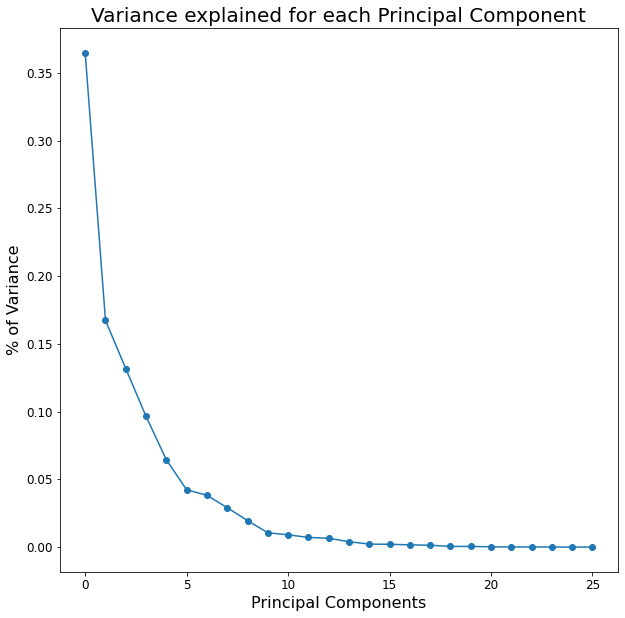

In [64]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Variance explained for each Principal Component", fontsize=20)
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.xlabel("Principal Components", fontsize=16)
plt.ylabel("% of Variance", fontsize=16);

It is a bar chart where the height of each bar is the percentage of variance explained by the associated PC. 

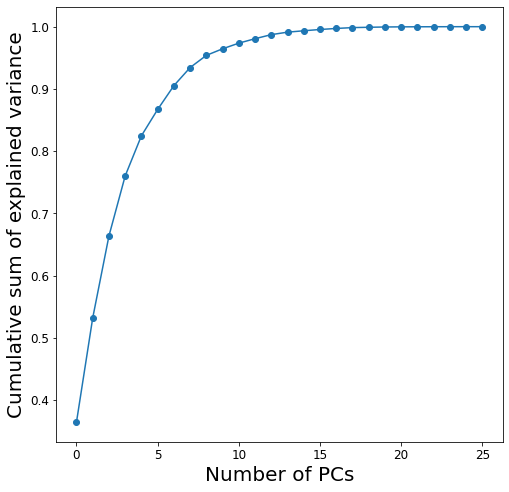

In [65]:
plt.figure(figsize=(8,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of PCs', fontsize=20)
plt.ylabel('Cumulative sum of explained variance' , fontsize=20);

Text(0, 0.5, 'Proportion of Variance Explained')

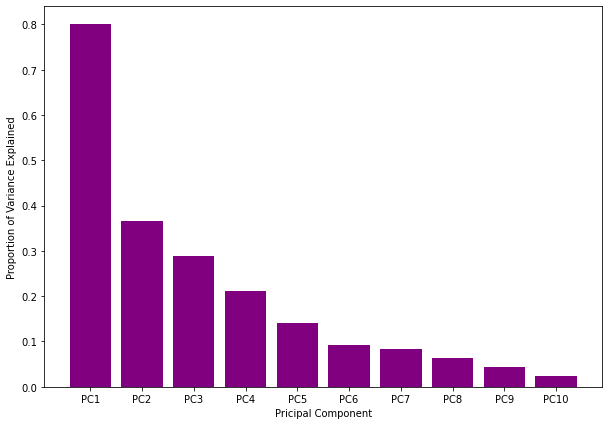

In [66]:
var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(10,7))
plt.bar(labels,var,color=['purple'])
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')

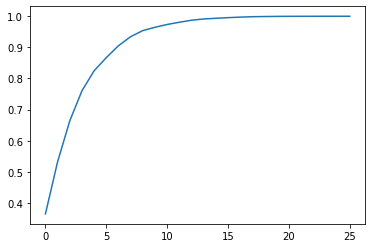

In [67]:
plt.plot(cumsum)


In [68]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"})

On top of that, we can also look at the combinations of variables that created each principal component with pca.components_**2. We could use a heat map to showcase this

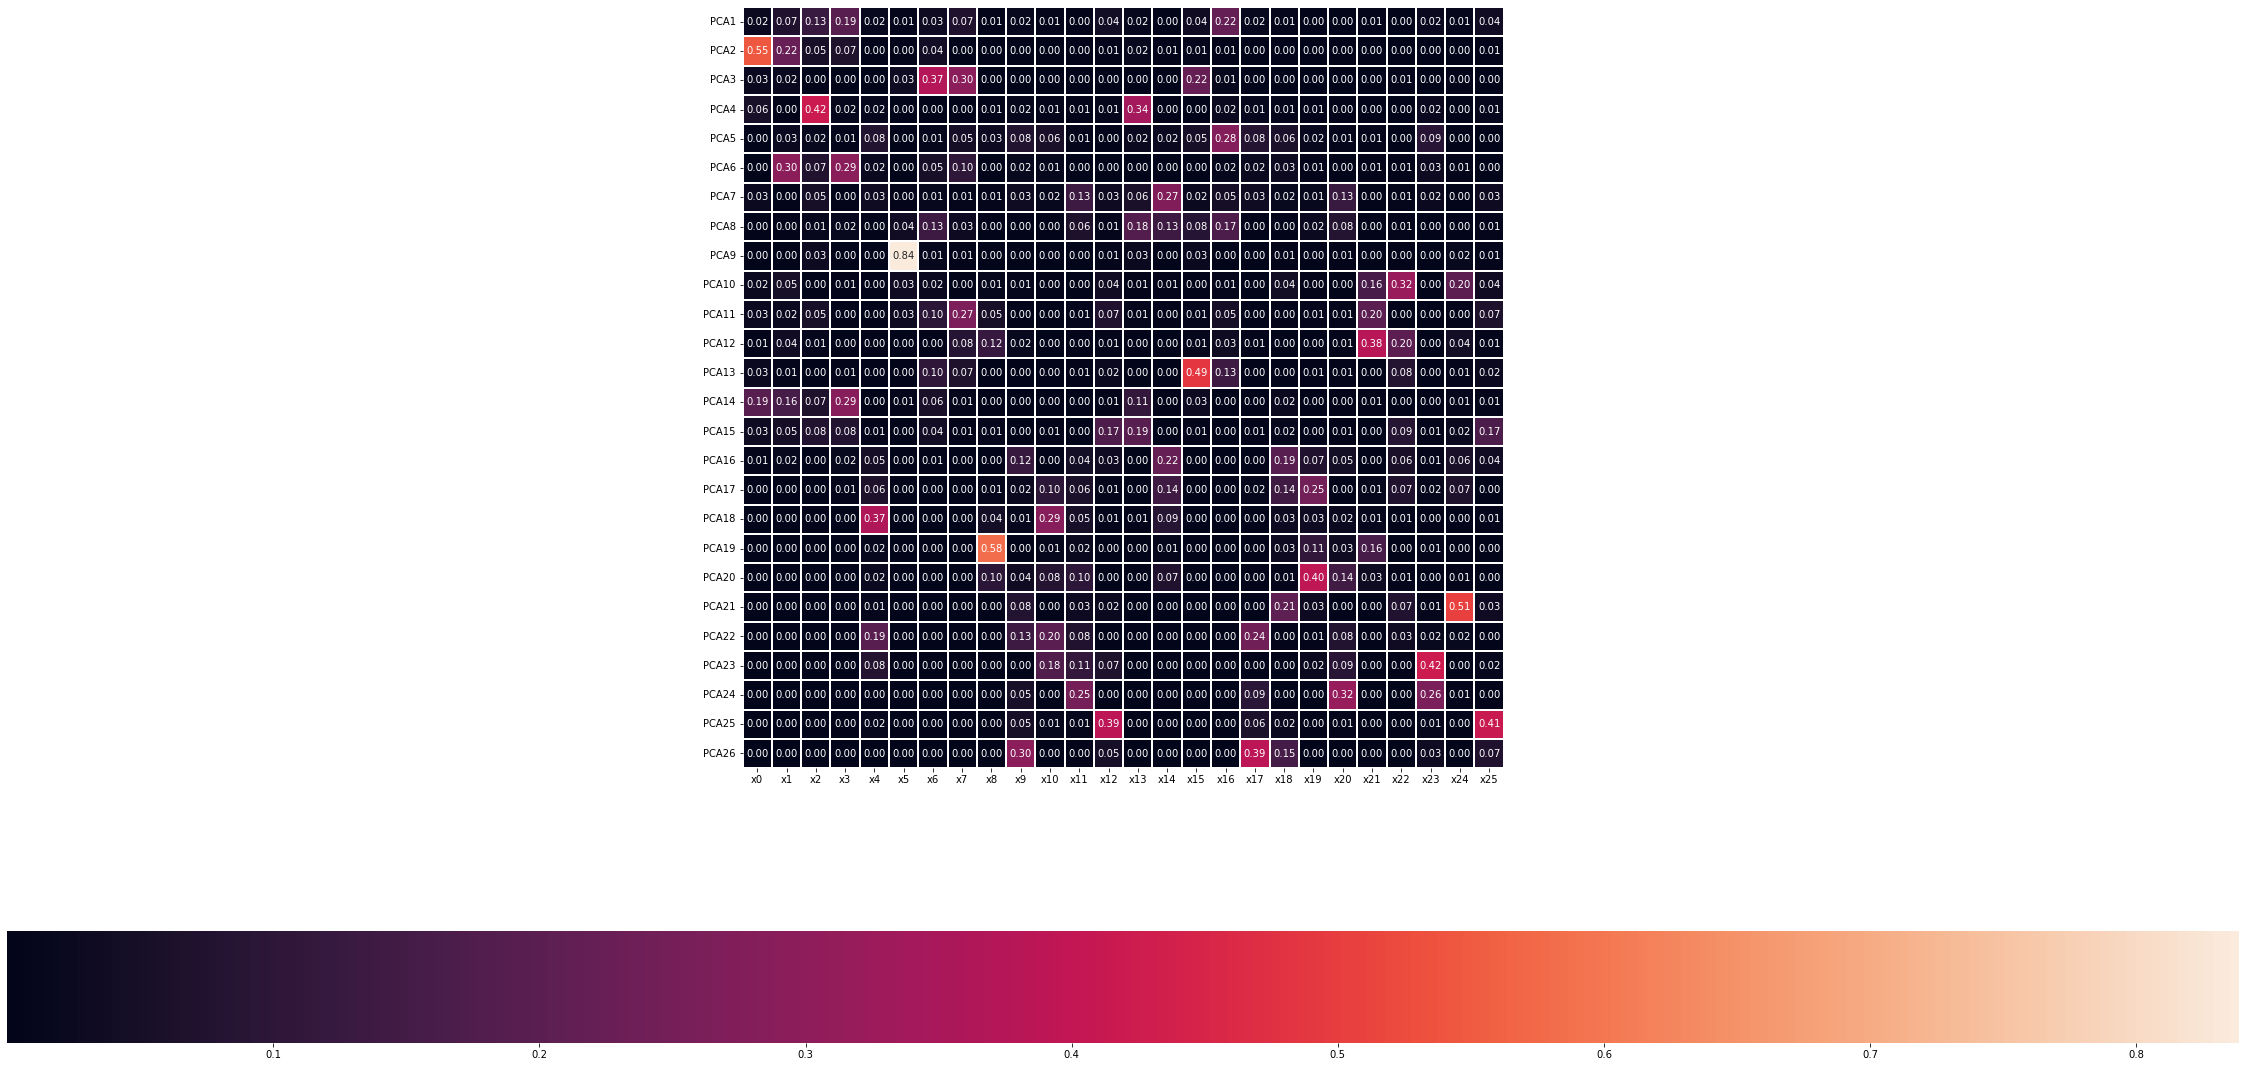

In [69]:
#Heatmap PCA
fig, ax = plt.subplots(figsize=(40,20)) 
col_name = ['x' + str(idx) for idx in range(0, X_train_new.shape[1])]

_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d

# Everything Together

Let's use the pipeline to wrap everything together and to find the best configuration for the different hyper-parameters



In [70]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipeline = Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA()), ('LDA', LinearDiscriminantAnalysis())]) # Pipeline the entire process: Scale the data -> PCA -> LDA Classifier

n_components = list(range(1,21)) # We will try different numbers of principal components

#Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {"pca__n_components":n_components}

estimator = GridSearchCV(pipeline, param_grid, cv=5) # Create a grid search to try all the possible number of PCs
estimator.fit(X_selected1, y_selected1.values.ravel());

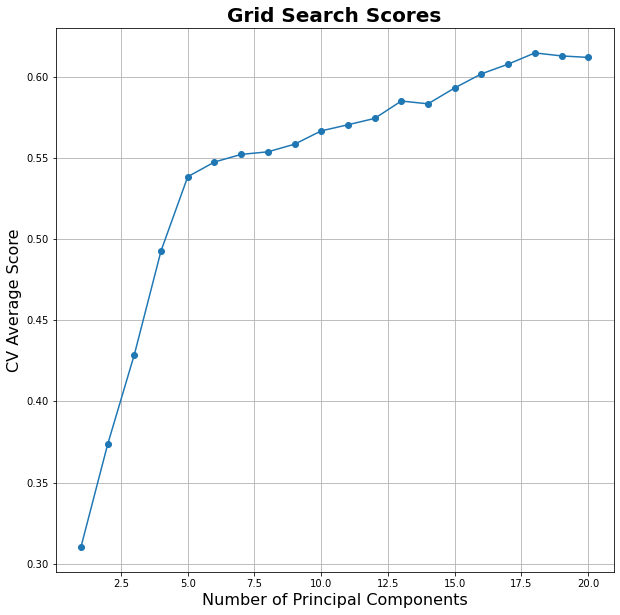

In [71]:
# Get Test Scores Mean and std for each grid search
scores_mean = estimator.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean)

scores_sd = estimator.cv_results_['std_test_score']
scores_sd = np.array(scores_sd)

# Plot Grid search scores
plt.figure(figsize=(10,10))
plt.plot(n_components, scores_mean, '-o')

plt.title("Grid Search Scores", fontsize=20, fontweight='bold')
plt.xlabel("Number of Principal Components", fontsize=16)
plt.ylabel('CV Average Score', fontsize=16)
plt.grid('on')

As can be seen in the graph, the optimal number of PCs to select will be a high number. Above 25 will explain only 55%, but increasing the number of features does not add much value. 

In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create a classifier: a Fisher's LDA classifier
lda = LinearDiscriminantAnalysis(n_components=5)

# Train lda on the first half of the digits
X_LDA_2D = lda.fit_transform(X_train_new, y_train_new)

In [74]:
8# Using the Plotly library again
traceLDA = go.Scatter(
    x = X_LDA_2D[:,0],
    y = X_LDA_2D[:,1],
    name = '',
#     hoveron = Target,
    mode = 'markers',
#     text = Target.unique(),
    showlegend = True,
    marker = dict(
        size = 8,
        color = y_train_new,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceLDA]

layout = dict(title = 'LDA (Linear Discriminant Analysis)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

https://www.kaggle.com/code/maniyar2jaimin/interactive-plotly-guide-to-pca-lda-t-sne